## Import Necessary Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
from collections import Counter
import matplotlib.patches as mpatches

## Load the Dataset

In [4]:
df = pd.read_csv('/content/ChatGPT_Education_Analysis.csv')

In [1]:
# list(df.head())

In [19]:
df.head()

,Unnamed: 0,Cititzenship,Gender,Age,Country_of_Study,Institution_Name,Institution_Funding_Type,Student_status,Study_Level,first_year_bachelors,...,Respectful_to_others,Persistent_finisher,Comfortable_with_self,Values_art_beauty,Full_of_energy,Assumes_best_about_people,Dependable/Steady,Emotionally_stable,Original_new_ideas,source
0,0,Afghanistan,Female,27.0,Afghanistan,القدس المفتوحة,Public,Full-time,Undergraduate Certificate/Diploma/Bachelor's d...,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR
1,1,Afghanistan,Prefer not to say,100.0,Afghanistan,456,Private,Part-time,Doctoral degree (3rd level),No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
2,2,Afghanistan,Male,21.0,Albania,منيا,Public,Full-time,Undergraduate Certificate/Diploma/Bachelor's d...,Yes,...,Neutral,Disagree,Neutral,Agree,Neutral,Disagree,Disagree,Strongly disagree,Strongly disagree,EN
3,3,Afghanistan,Male,18.0,Ecuador,"Universidad Indoamerica., Facultad Arquitectur...",Private,Full-time,Undergraduate Certificate/Diploma/Bachelor's d...,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,ES
4,4,Afghanistan,Female,26.0,Spain,De vigo universidad,Public,Part-time,Postgraduate Certificate/Diploma/Master's degr...,Yes,...,Agree,Neutral,Agree,Neutral,Neutral,Neutral,Agree,Neutral,Agree,ES


## Descriptive Stats / Initial Analysis

count    22919.000000
mean        23.125311
std          6.821289
min         18.000000
25%         19.000000
50%         21.000000
75%         23.000000
max        100.000000
Name: Age, dtype: float64


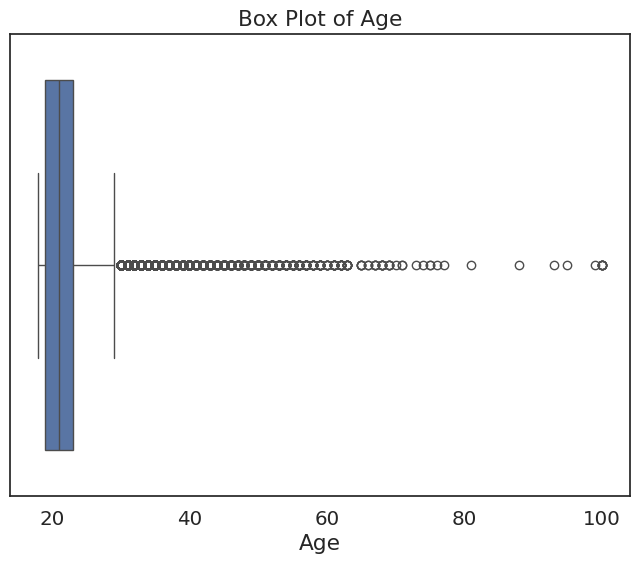

In [25]:
# Age Statistics

# Filter age column
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Descriptive statistics
print(df_filtered['Age'].describe())

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['Age'])
plt.title('Box Plot of Age')
plt.show()


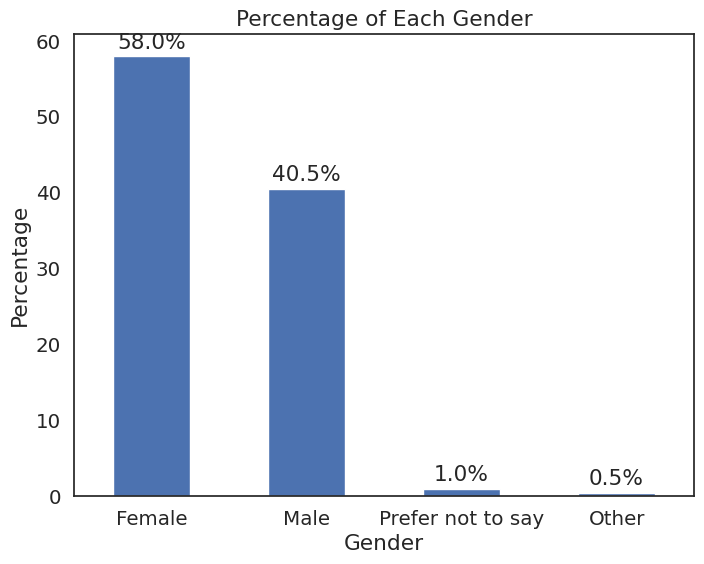

In [30]:
# Gender Statistcs

# Calculate the percentage of each gender
gender_counts = df['Gender'].value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Percentage of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add percentage labels on top of each bar
for i, v in enumerate(gender_counts):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()


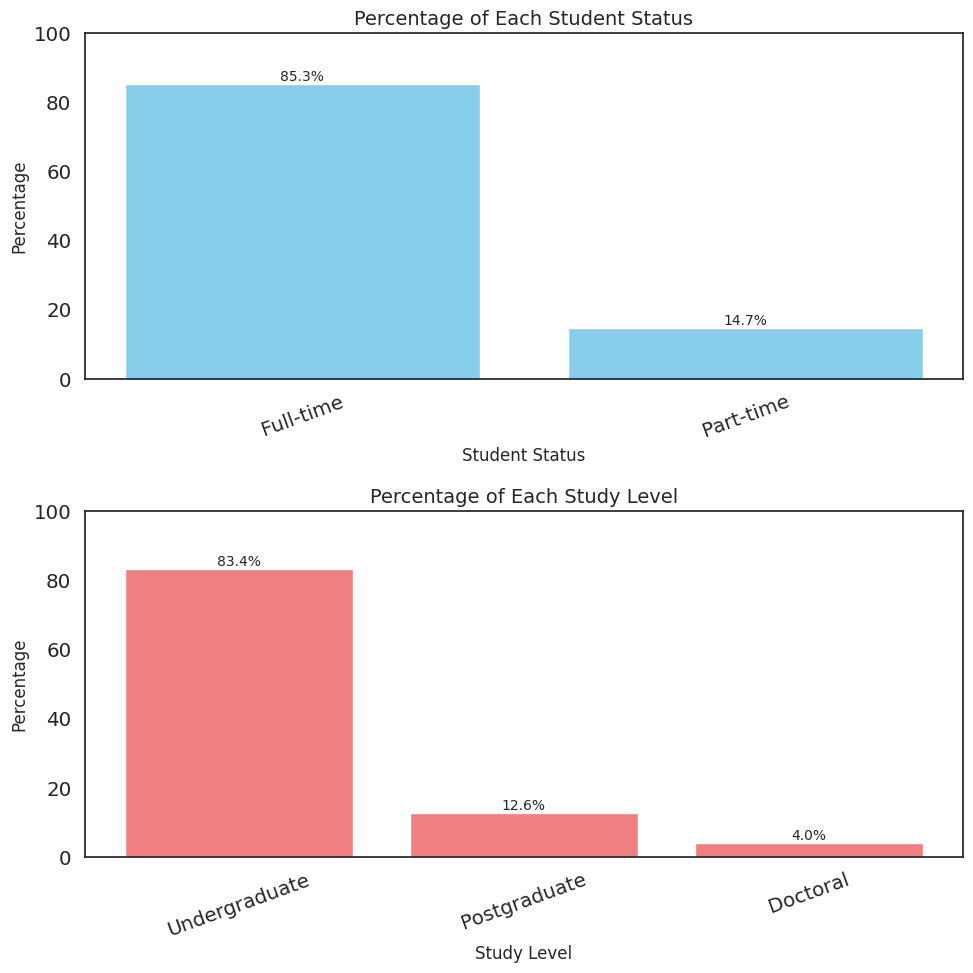

In [39]:
# --- Step 1: Prepare the data ---

# Map cleaner names if needed
study_level_mapping = {
    'Undergraduate Certificate/Diploma/Bachelor\'s degree (1st level)': 'Undergraduate',
    'Postgraduate Certificate/Diploma/Master\'s degree (2nd level)': 'Postgraduate',
    'Doctoral degree (3rd level)': 'Doctoral'
}

student_status_mapping = {
    'Current student': 'Current Student',
    'Graduated student': 'Graduate',
    'Prospective student': 'Prospective Student'
}

# Apply mappings
df['Study_Level_Clean'] = df['Study_Level'].replace(study_level_mapping)
df['Student_status_Clean'] = df['Student_status'].replace(student_status_mapping)

# Calculate percentages
student_status_counts = df['Student_status_Clean'].value_counts(normalize=True) * 100
study_level_counts = df['Study_Level_Clean'].value_counts(normalize=True) * 100

# --- Step 2: Plot both graphs one below another ---

fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column

# Plot for Student Status
axes[0].bar(student_status_counts.index, student_status_counts.values, color='skyblue')
axes[0].set_title('Percentage of Each Student Status', fontsize=14)
axes[0].set_xlabel('Student Status', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].set_ylim(0, 100)  # To give room for text labels
axes[0].tick_params(axis='x', labelrotation=20)
for i, v in enumerate(student_status_counts.values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

# Plot for Study Level
axes[1].bar(study_level_counts.index, study_level_counts.values, color='lightcoral')
axes[1].set_title('Percentage of Each Study Level', fontsize=14)
axes[1].set_xlabel('Study Level', fontsize=12)
axes[1].set_ylabel('Percentage', fontsize=12)
axes[1].set_ylim(0, 100)
axes[1].tick_params(axis='x', labelrotation=20)
for i, v in enumerate(study_level_counts.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Question 1: ChatGPT on Emotions

<ipython-input-12-3270ef8ee1dc>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-12-3270ef8ee1dc>:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( loc='lower right', frameon=False)


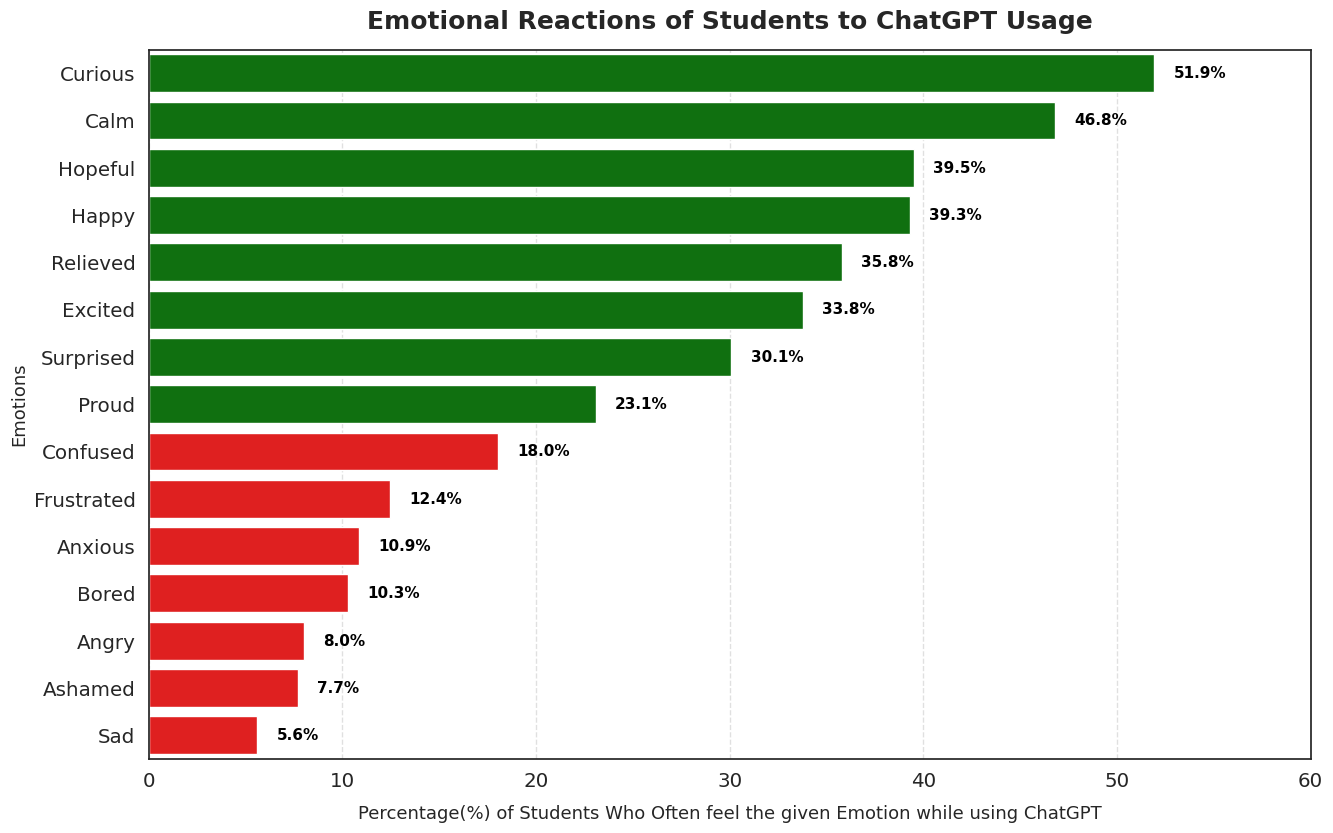

In [12]:
# Load dataset
df = pd.read_csv("ChatGPT_Education_Analysis.csv")

# Emotion columns from the survey
emotions = [
    'Bored', 'Hopeful', 'Sad', 'Ashamed', 'Calm', 'Angry', 'Relieved', 'Happy',
    'Proud', 'Anxious', 'Surprised', 'Curious', 'Excited', 'Confused', 'Frustrated'
]

# Drop rows with missing emotion responses
emotion_df = df[emotions].dropna()

# Calculate % of "Often" or "Always"
high_freq = emotion_df.apply(lambda col: col.isin(['Often', 'Always']).mean() * 100)
high_freq_sorted = high_freq.sort_values(ascending=False)

# Define positive and negative emotions
positive_emotions = ['Hopeful', 'Calm', 'Relieved', 'Happy', 'Proud', 'Surprised', 'Curious', 'Excited']
negative_emotions = ['Bored', 'Sad', 'Ashamed', 'Angry', 'Anxious', 'Confused', 'Frustrated']

# Assign colors: green for positive, red for negative
colors = ['green' if emotion in positive_emotions else 'red' for emotion in high_freq_sorted.index]

# Use modern font
plt.rcParams['font.family'] = 'Arial'

# --- 📊 Plot Styling ---
sns.set(style="white", font_scale=1.3)
plt.figure(figsize=(14, 9))

# Barplot
sns.barplot(
    x=high_freq_sorted.values,
    y=high_freq_sorted.index,
    palette=colors
)

# Title and subtitle
plt.title("Emotional Reactions of Students to ChatGPT Usage", fontsize=18, weight='bold', pad=15)
#plt.suptitle("Percent of Students Frequently Feeling These Emotions While Using ChatGPT", fontsize=13, y=0.93, color='dimgray')

# Axis labels
plt.xlabel("Percentage(%) of Students Who Often feel the given Emotion while using ChatGPT", fontsize=13, labelpad=10)
plt.ylabel("Emotions", fontsize=13)

# Value labels on bars
for i, v in enumerate(high_freq_sorted.values):
    plt.text(v + 1, i, f"{v:.1f}%", color='black', va='center', fontsize=11, fontweight='bold')

# Add legend
legend_handles = [
    mpatches.Patch(color='green', label='Positive Emotion'),
    mpatches.Patch(color='red', label='Negative Emotion')
]
plt.legend( loc='lower right', frameon=False)

# Clean layout
plt.xlim(0, high_freq_sorted.max() + 8)
plt.xticks(range(0, int(high_freq_sorted.max() + 10), 10))
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout(pad=2)

# Optional: Save high-res version
plt.savefig("Student_Emotions_ChatGPT.png", dpi=300, bbox_inches='tight')

plt.show()


## Question 2: Age vs Extent of ChatGPT being used

In [13]:
# Load dataset
df = pd.read_csv('/content/ChatGPT_Education_Analysis.csv')

# Filter for valid ages between 18 and 100
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Drop rows where 'ChatGPT_Extent_used' is null
df_filtered = df_filtered.dropna(subset=['ChatGPT_Extent_used'])

# Standardize values in 'ChatGPT_Extent_used'
df_filtered['ChatGPT_Extent_used'] = df_filtered['ChatGPT_Extent_used'].replace({
    'considerably and extensively': 'Considerably',
    'occasionally and rarely': 'Occasionally'
})

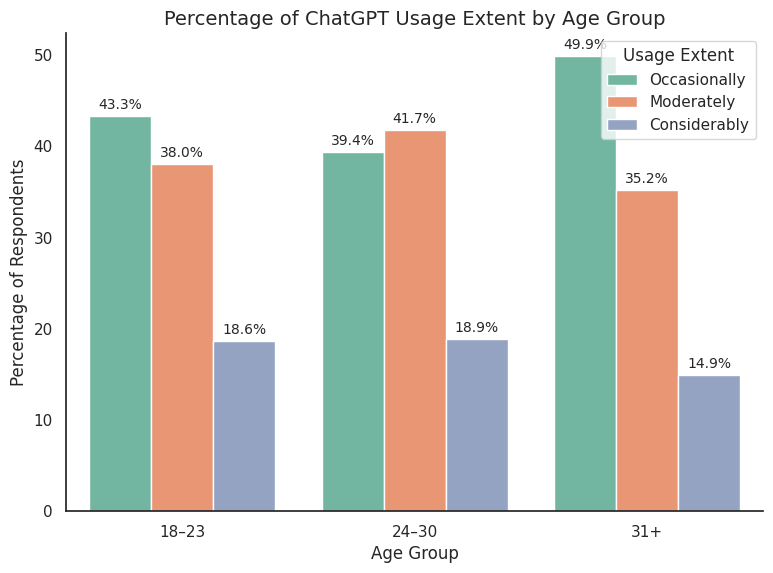

In [18]:
# --- Step 1: Prepare the data ---

# Define age bins and labels
age_bins = [18, 23, 30, 100]
age_labels = ['18–23', '24–30', '31+']
df_filtered['Age_Group'] = pd.cut(df_filtered['Age'], bins=age_bins, labels=age_labels, right=False)

# Filter only relevant usage levels
usage_levels = ['Occasionally', 'Moderately', 'Considerably']
df_usage = df_filtered[df_filtered['ChatGPT_Extent_used'].isin(usage_levels)]

# Count and normalize within each group
usage_counts = df_usage.groupby(['Age_Group', 'ChatGPT_Extent_used'], observed=True).size().reset_index(name='Count')
total_by_group = usage_counts.groupby('Age_Group', observed=True)['Count'].transform('sum')
usage_counts['Percentage'] = (usage_counts['Count'] / total_by_group) * 100

# --- Step 2: Plot with distinct colors ---

# Define a specific color palette: one different color for each extent
custom_palette = {
    'Occasionally': '#66c2a5',   # Greenish
    'Moderately':   '#fc8d62',   # Orange
    'Considerably': '#8da0cb'    # Blueish
}

# Correct hue order
hue_order = ['Occasionally', 'Moderately', 'Considerably']

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=usage_counts,
    x='Age_Group',
    y='Percentage',
    hue='ChatGPT_Extent_used',
    hue_order=hue_order,
    palette=custom_palette,
    width=0.8
)

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

# Set title and labels
plt.title('Percentage of ChatGPT Usage Extent by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)

# Customize ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Customize legend
plt.legend(title='Usage Extent', title_fontsize=12, fontsize=11)

# Optional: remove top/right borders
sns.despine()

# Final layout
plt.tight_layout()
plt.show()

## Question 3: ChatGPT Free vs Paid Version

In [5]:
# Load your CSV file
df = pd.read_csv('ChatGPT_Education_Analysis.csv')

# Step 1: Combine values in 'Chatgpt_version' column
df['Chatgpt_version'] = df['Chatgpt_version'].replace(
    ['Both', 'ChatGPT-4 (with a subscription)'],
    'ChatGPT-4 (with a subscription)'
)

# Step 2: Drop rows where 'Chatgpt_version' is null
df = df.dropna(subset=['Chatgpt_version'])

# (Optional) Check the cleaned version counts
print(df['Chatgpt_version'].value_counts())


Chatgpt_version
ChatGPT-3.5 (free version)         14120
ChatGPT-4 (with a subscription)     1809
Name: count, dtype: int64


<ipython-input-6-c33585084993>:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_annots = comparison_df.applymap(lambda x: f"{x:.1f}%")


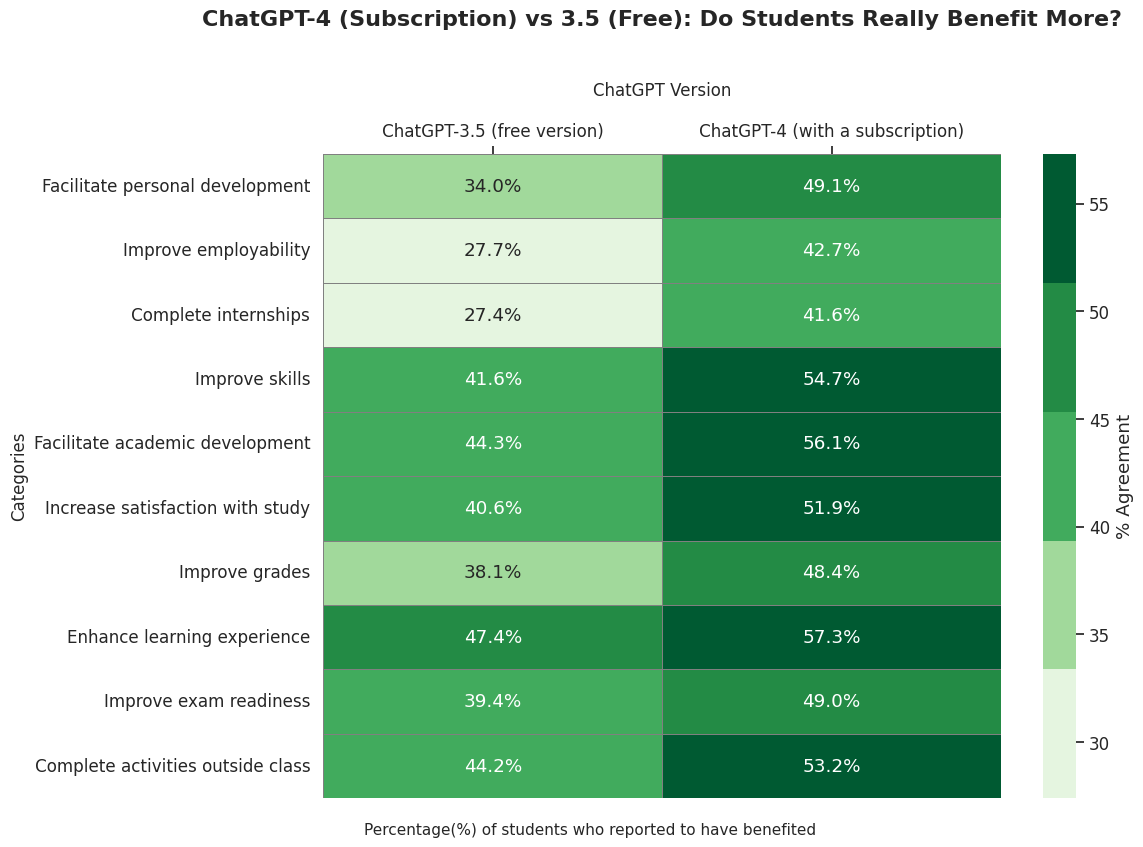

In [6]:
# Focused category

selected_columns = [
    'Improve_exam_readiness', 'Improve_grades', 'Complete_activities_outside_class',
    'Complete_internships', 'Enhance_learning_experience', 'Improve_skills',
    'Facilitate_personal_development', 'Facilitate_academic_development',
    'Increase_satisfaction_with_study', 'Improve_employability'
]

# Define high usage/agreement values
high_values = ['Often', 'Always', 'Agree', 'Strongly agree']
green_palette = ['#E5F5E0', '#A1D99B', '#41AB5D', '#238B45', '#005A32']

# Build result DataFrame
result = {}
for col in selected_columns:
    if col not in df.columns:
        continue
    percentages = (
        df[df[col].isin(high_values)]
        .groupby('Chatgpt_version').size()
        / df.groupby('Chatgpt_version').size() * 100
    )
    result[col.replace("_", " ")] = percentages

comparison_df = pd.DataFrame(result).T.fillna(0).round(1)
if not comparison_df.empty:
    comparison_df.index.name = 'Task'
    comparison_df['Gap'] = (
        comparison_df['ChatGPT-4 (with a subscription)'] -
        comparison_df['ChatGPT-3.5 (free version)']
    )
    comparison_df = comparison_df.sort_values(by='Gap', ascending=False).drop(columns='Gap')

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.set(font_scale=1.1, style="whitegrid")
    formatted_annots = comparison_df.applymap(lambda x: f"{x:.1f}%")

    ax = sns.heatmap(
        comparison_df,
        annot=formatted_annots,
        fmt='',
        cmap=green_palette,
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': '% Agreement'}
    )

    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.title(f"ChatGPT-4 (Subscription) vs 3.5 (Free): Do Students Really Benefit More?", fontsize=16, fontweight='bold', pad=40)
    plt.figtext(0.5, -0.02,
            "Percentage(%) of students who reported to have benefited",
            ha='center', fontsize=11)

    plt.xlabel("ChatGPT Version", fontsize=12, labelpad=20)
    plt.ylabel("Categories", fontsize=12)


    plt.tight_layout()
    plt.subplots_adjust(top=0.83)
    plt.savefig(f"Comparision.png", dpi=300)
    plt.show()


## Question 4 : How Students Use ChatGPT Across Key Academic Tasks

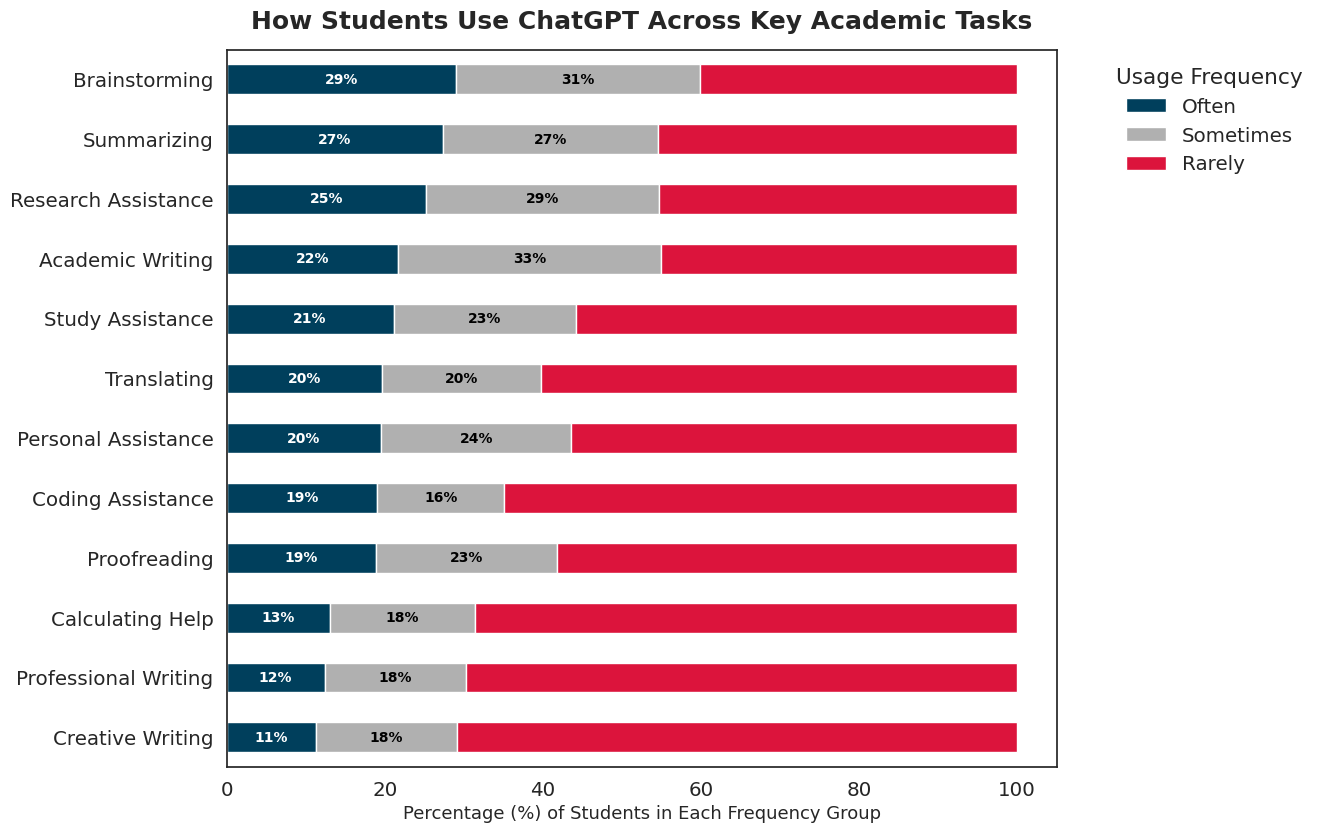

In [7]:
# Load dataset
df = pd.read_csv("ChatGPT_Education_Analysis.csv")

# Define original and renamed task columns
task_columns = {
    'Academic_Writing': 'Academic Writing',
    'Professional_Writing': 'Professional Writing',
    'Creative_Writing': 'Creative Writing',
    'Proofreading': 'Proofreading',
    'Brainstorming': 'Brainstorming',
    'Translating': 'Translating',
    'Summarizing': 'Summarizing',
    'Calculating_Help': 'Calculating Help',
    'Study_Assistance': 'Study Assistance',
    'Personal_Assistance': 'Personal Assistance',
    'Research_Assistance': 'Research Assistance',
    'Coding_Assistance': 'Coding Assistance'
}

# Prepare and reshape
df_tasks = df[list(task_columns.keys())].dropna()
df_tasks.rename(columns=task_columns, inplace=True)
df_melted = df_tasks.melt(var_name="Task", value_name="Frequency")

# Group frequency categories
frequency_group_map = {
    'Never': 'Rarely',
    'Rarely': 'Rarely',
    'Sometimes': 'Sometimes',
    'Often': 'Often',
    'Always': 'Often'
}
df_melted['Frequency_Grouped'] = df_melted['Frequency'].map(frequency_group_map)

# Pivot and normalize to percentages
grouped_order = ['Often', 'Sometimes', 'Rarely']
grouped_colors = ['#003f5c', '#B0B0B0', '#DC143C']
df_grouped_pivot = df_melted.groupby(['Task', 'Frequency_Grouped']).size().unstack(fill_value=0)[grouped_order]
df_grouped_percent = df_grouped_pivot.div(df_grouped_pivot.sum(axis=1), axis=0) * 100
df_grouped_percent = df_grouped_percent.sort_values(by='Often', ascending=True)

# Plot
sns.set(style="white", font_scale=1.3)
fig, ax = plt.subplots(figsize=(14, 9))
df_grouped_percent.plot(kind='barh', stacked=True, color=grouped_colors, ax=ax)

# Add percentage labels on each segment (exclude red)
for i, (task, row) in enumerate(df_grouped_percent.iterrows()):
    start = 0
    for freq in grouped_order:
        val = row[freq]
        if val > 4 and freq != 'Rarely':
            ax.text(start + val / 2, i, f"{val:.0f}%",
                    color='white' if freq == 'Often' else 'black',
                    ha='center', va='center', fontsize=10, fontweight='bold')
        start += val

# Titles and polish
ax.set_title("How Students Use ChatGPT Across Key Academic Tasks", fontsize=18, weight='bold', pad=15)
ax.set_xlabel("Percentage (%) of Students in Each Frequency Group", fontsize=13)
ax.set_ylabel("")
ax.legend(title="Usage Frequency", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.grid(False)
plt.tight_layout(pad=2)

# Export
plt.savefig("ChatGPT_Usage_Different_tasks.png", dpi=300, bbox_inches='tight')
plt.show()
